In [1]:
import pandas as pd
import numpy as np
import random

/tmp/ipykernel_15048/605883380.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
s = pd.Series([1, 2, 3, 4, 3, 2, 1])

In [3]:
s

0    1
1    2
2    3
3    4
4    3
5    2
6    1
dtype: int64

<Axes: >

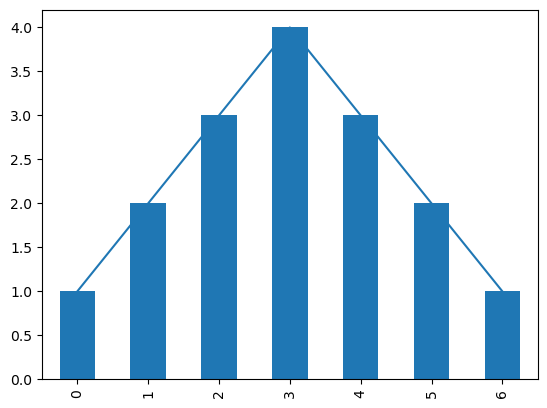

In [4]:
s.plot()
s.plot(kind='bar')

In [5]:
d_arr = [[random.randrange(-10, 10), random.randrange(0, 30)] for i
in range(100)]

<Axes: >

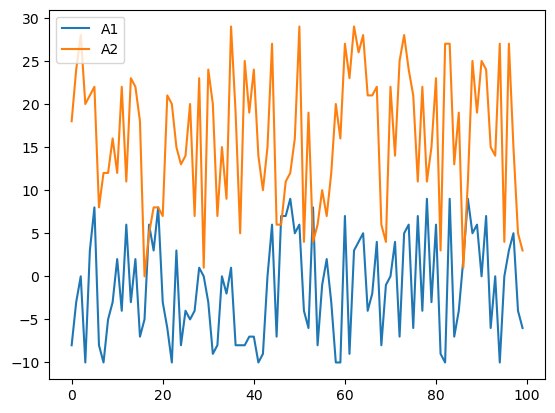

In [6]:
df = pd.DataFrame(d_arr, columns=['A1', 'A2'])
df.plot()

In [7]:
np.random.seed(123)

df = pd.DataFrame(np.random.randn(7, 5), columns=['a', 'b', 'c', 'd',
'e'])


df

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [8]:
df.style.format("{:.3} °C")

,a,b,c,d,e
0,-1.09 °C,0.997 °C,0.283 °C,-1.51 °C,-0.579 °C
1,1.65 °C,-2.43 °C,-0.429 °C,1.27 °C,-0.867 °C
2,-0.679 °C,-0.0947 °C,1.49 °C,-0.639 °C,-0.444 °C
3,-0.434 °C,2.21 °C,2.19 °C,1.0 °C,0.386 °C
4,0.737 °C,1.49 °C,-0.936 °C,1.18 °C,-1.25 °C
5,-0.638 °C,0.907 °C,-1.43 °C,-0.14 °C,-0.862 °C
6,-0.256 °C,-2.8 °C,-1.77 °C,-0.7 °C,0.927 °C


In [9]:
f_dict = {'b': '{:.3} °C'}
df.style.format(f_dict)


,a,b,c,d,e
0,-1.085631,0.997 °C,0.282978,-1.506295,-0.578600
1,1.651437,-2.43 °C,-0.428913,1.265936,-0.866740
2,-0.678886,-0.0947 °C,1.491390,-0.638902,-0.443982
3,-0.434351,2.21 °C,2.186786,1.004054,0.386186
4,0.737369,1.49 °C,-0.935834,1.175829,-1.253881
5,-0.637752,0.907 °C,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.8 °C,-1.771533,-0.699877,0.927462


In [10]:
df.style.format(lambda x: None if x < 0 else "{:.2f}".format(x))

,a,b,c,d,e
0,None,1.00,0.28,None,None
1,1.65,None,None,1.27,None
2,None,None,1.49,None,None
3,None,2.21,2.19,1.00,0.39
4,0.74,1.49,None,1.18,None
5,None,0.91,None,None,None
6,None,None,None,None,0.93


In [11]:
df.style.format(lambda x: None if x > 0 else f"{round(x, 3)} °C")

,a,b,c,d,e
0,-1.086 °C,None,None,-1.506 °C,-0.579 °C
1,None,-2.427 °C,-0.429 °C,None,-0.867 °C
2,-0.679 °C,-0.095 °C,None,-0.639 °C,-0.444 °C
3,-0.434 °C,None,None,None,None
4,None,None,-0.936 °C,None,-1.254 °C
5,-0.638 °C,None,-1.429 °C,-0.14 °C,-0.862 °C
6,-0.256 °C,-2.799 °C,-1.772 °C,-0.7 °C,None


In [12]:
def font_color_mod(val):
    color_val = "black"
    if val < 0:
        color_val = "red"
    elif val >= 2:
        color_val = "green"

    return f"color: {color_val}"

df_font_mod = df.style.map(font_color_mod)
df_font_mod

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [13]:
def highlight_min_max_in_column(row: pd.Series):
    min_map = row == row.min()
    max_map = row == row.max()

    style_table = []
    for m in zip(min_map, max_map):
        tmp = 'background-color: blue' if m[0] else ''
        tmp = 'background-color: yellow' if m[1] else tmp if len(tmp)>0 else ''
        style_table.append(tmp)
    return style_table
    
df.style.apply(highlight_min_max_in_column, axis=0)

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [14]:
def highlight_row(row):
    style_table = ["background-color: coral"] * len(row) if abs(row).max() > 2 else [''] * len(row)
    return style_table

df.style.apply(highlight_row, axis=1)

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [18]:
df.style.highlight_max()

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [20]:
df.style.highlight_min(axis=1)

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [23]:
df.iloc[3,4] = None
df.iloc[4,1] = None
df.style.highlight_null(color="green")

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,nan
4,0.737369,nan,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [24]:
df.style.background_gradient(cmap="plasma")

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,nan
4,0.737369,nan,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [26]:
df.style.bar(subset=["a", "b"], color="blue")

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,nan
4,0.737369,nan,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462


In [30]:
(df.style
.map(font_color_mod)
.bar(subset=['a', 'b'], color="orange")
.highlight_null(color="crimson")
)

,a,b,c,d,e
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,nan
4,0.737369,nan,-0.935834,1.175829,-1.253881
5,-0.637752,0.907105,-1.428681,-0.140069,-0.861755
6,-0.255619,-2.798589,-1.771533,-0.699877,0.927462
